In [26]:
import seaborn as sb
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
missing = {"NAN"}
df = pd.read_csv("meteo-nogal-09.csv",engine = "python",na_values = ["NAN"]) 

In [3]:
#Me fijo como se llaman las columnas que no se ocupan
df.columns

Index(['DATE', 'TIME', 'Unnamed: 2', 'Unnamed: 3', 'u_Avg', 'v_Avg', 'w_Avg',
       't_Avg', 'kh20_Avg', 'net_rad_Avg', 'shf1_Avg', 'shf2_Avg', 'vv_Avg',
       'airT_Avg', 'rh_Avg', 'e_sat_Avg', 'e_Avg', 'h2o_hmp_Avg',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35'],
      dtype='object')

In [4]:
#Obtengo el nombre exacto de las columnas que no se ocupan para despues eliminarlas
Unnames = []
for i in range(0,len(df.columns)):
    if(re.search("^Unnamed",df.columns[i]) != None):
        Unnames.append(df.columns[i])
Unnames

['Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Unnamed: 29',
 'Unnamed: 30',
 'Unnamed: 31',
 'Unnamed: 32',
 'Unnamed: 33',
 'Unnamed: 34',
 'Unnamed: 35']

In [5]:
df.head()

,DATE,TIME,Unnamed: 2,Unnamed: 3,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,TS,NaN,NaN,NaN,m/s,m/s,m/s,degC,mV,w/m2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-01-09,00:10,1.0,NaN,1.215,0.506,-0.044,10.95,1.159,-176.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-01-09,00:20,1.0,NaN,0.892,0.588,-0.072,10.81,1.159,-176.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-01-09,00:30,1.0,NaN,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-01-09,00:40,1.0,NaN,1.135,0.7410001,-0.093,9.8,1.258,-182.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Eliminar las columnas Unnamed y el primer renglon ya que éste no aporta datos. Además reviso el tipo los datos de cada columna
df = df.drop(Unnames,1)
df = df.drop(0,0)
df.dtypes

DATE            object
TIME            object
u_Avg           object
v_Avg           object
w_Avg           object
t_Avg           object
kh20_Avg        object
net_rad_Avg     object
shf1_Avg        object
shf2_Avg        object
vv_Avg          object
airT_Avg        object
rh_Avg         float64
e_sat_Avg       object
e_Avg           object
h2o_hmp_Avg     object
dtype: object

In [8]:
#Recorto los datos para solamente utilizar los datos de 2009, al igual que convierto la columna DATE a formato fecha
df["DATE"] = pd.to_datetime(df["DATE"])
df = df[df["DATE"] < "2010-01-01"]
df.tail()

,DATE,TIME,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
52333,2009-12-31,23:10:00,0.736,-0.135,12.49,1050,-76.38,NaN,NaN,2.595,12.82,0.482,1.480,0.713,5.405,NaN
52334,2009-12-31,23:20:00,0.711,-0.106,12.24,1047,-75.03,NaN,NaN,2.517,12.62,0.489,1.460,0.714,5.416,NaN
52335,2009-12-31,23:30:00,0.746,-0.116,11.9,1043,-74.88,NaN,NaN,2.38,12.3,0.5,1.430,0.715,5.428,NaN
52336,2009-12-31,23:40:00,0.641,-0.084,11.53,1054,-71.33,NaN,NaN,2.182,11.88,0.509,1.391,0.708,5.383,NaN
52337,2009-12-31,23:50:00,0.538,-0.075,11.31,1064,-69.4,NaN,NaN,2.102,11.54,0.516,1.360,0.701,5.338,NaN


In [9]:
#Convertir las variables de object a float64
tempD = df["DATE"]
tempT = df["TIME"]
df[df.columns] = df[df.columns].apply(pd.to_numeric, errors='coerce')
df["DATE"] = tempD
df["TIME"] = tempT
df.dtypes

DATE           datetime64[ns]
TIME                   object
u_Avg                 float64
v_Avg                 float64
w_Avg                 float64
t_Avg                 float64
kh20_Avg              float64
net_rad_Avg           float64
shf1_Avg              float64
shf2_Avg              float64
vv_Avg                float64
airT_Avg              float64
rh_Avg                float64
e_sat_Avg             float64
e_Avg                 float64
h2o_hmp_Avg           float64
dtype: object

In [17]:
#Me aseguro de que todo está bien
df.head()

,DATE,TIME,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
1,2009-01-01,00:10,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.400000,0.899,1.178,1.059,8.120000
2,2009-01-01,00:20,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.240000,0.896,1.166,1.045,8.020000
3,2009-01-01,00:30,1.227,0.685,-0.069,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001
4,2009-01-01,00:40,1.135,0.741,-0.093,9.80,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737000
5,2009-01-01,00:50,0.755,1.064,-0.149,8.87,1.332,-184.8,23.22,-26.39,1.359,8.630000,0.859,1.119,0.961,7.390000


In [19]:
#Construyo la matriz de correlacion
corr = df.corr()

In [20]:
corr

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
u_Avg,1.000000,0.241494,0.015906,0.044331,-0.049445,-0.094394,0.089411,0.003542,-0.163176,-0.363548,0.331126,-0.370644,0.103343,0.173845
v_Avg,0.241494,1.000000,0.009572,0.011734,0.155188,-0.117176,0.029321,-0.053846,-0.088159,-0.344386,0.098515,-0.347170,-0.109168,-0.189840
w_Avg,0.015906,0.009572,1.000000,0.601335,0.128426,0.133556,-0.079466,-0.010182,0.912885,-0.338470,0.737544,-0.192107,0.646316,0.125133
t_Avg,0.044331,0.011734,0.601335,1.000000,-0.009929,0.266318,-0.094414,-0.006335,0.529160,-0.231403,0.367252,-0.139445,0.306703,0.576896
kh20_Avg,-0.049445,0.155188,0.128426,-0.009929,1.000000,-0.157759,-0.005268,-0.061590,0.152027,-0.122687,0.024498,-0.123180,-0.126972,-0.326760
net_rad_Avg,-0.094394,-0.117176,0.133556,0.266318,-0.157759,1.000000,-0.206065,-0.027206,0.162470,0.334375,-0.266374,0.385945,0.074294,0.056376
shf1_Avg,0.089411,0.029321,-0.079466,-0.094414,-0.005268,-0.206065,1.000000,0.059003,-0.089608,-0.121637,0.084782,-0.138901,-0.016448,0.014207
shf2_Avg,0.003542,-0.053846,-0.010182,-0.006335,-0.061590,-0.027206,0.059003,1.000000,-0.017229,0.078023,0.017651,0.081718,0.051809,0.151206
vv_Avg,-0.163176,-0.088159,0.912885,0.529160,0.152027,0.162470,-0.089608,-0.017229,1.000000,-0.223757,0.582047,-0.091182,0.521232,-0.193064
airT_Avg,-0.363548,-0.344386,-0.338470,-0.231403,-0.122687,0.334375,-0.121637,0.078023,-0.223757,1.000000,-0.484177,0.964464,0.088203,0.464621


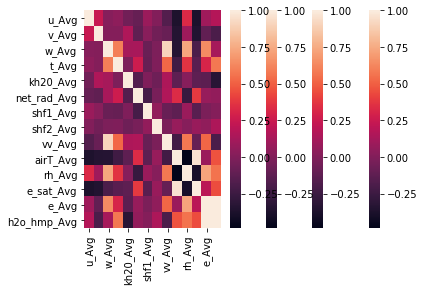

In [27]:
sb.heatmap(corr)
plt.show()